In [119]:
import time
import random
from bs4 import BeautifulSoup as bs
import bs4 as bs
from bs4 import SoupStrainer

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [2]:
import requests
import random

headers_list = [
    # Firefox 77 Mac
    {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
    },
    # Chrome 92.0 Win10
    {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
    },
    # Chrome 91.0 Win10
    {
    "Connection": "keep-alive",
    "DNT": "1",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.google.com/",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
    },
    # Firefox 90.0 Win10
    {
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.google.com/",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9"
    }
]

/Users/nikitasiddi/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
headers = random.choice(headers_list)
r = requests.Session()
r.headers = headers

# Getting the spotify user reviews from the ongoing issues page of spotify community
https://community.spotify.com/t5/forums/searchpage/tab/message/page/1?collapse_discussion=true&q=recommendations&search_type=thread%27

In [19]:
review_links=[]
for i in range(1,101):
    link='https://community.spotify.com/t5/forums/searchpage/tab/message/page/'+str(i)+'?collapse_discussion=true&q=recommendations&search_type=thread'
    html=r.get(link).text
    soup=bs.BeautifulSoup(html,'html.parser')
    for i in soup.find_all('a',class_='page-link lia-link-navigation lia-custom-event'):
        review_link= i.get('href')
        review_links.append('https://community.spotify.com'+str(review_link))
   

In [20]:
review_links

['https://community.spotify.com/t5/Live-Ideas/Mobile-Other-Remove-or-manage-Your-top-podcasts-from-mobile-home/idi-p/4768099?search-action-id=328648410369&search-result-uid=4768099',
 'https://community.spotify.com/t5/Ongoing-Issues/Refresh-button-for-Recommended-songs-section-not-working/idi-p/5252127?search-action-id=328648410369&search-result-uid=5252127',
 'https://community.spotify.com/t5/Ongoing-Issues/Recommended-songs-missing-for-some-playlists/idi-p/5211397?search-action-id=328648410369&search-result-uid=5211397',
 'https://community.spotify.com/t5/Desktop-Mac/How-can-I-stop-getting-podcast-recommendations/m-p/5093950?search-action-id=328648410369&search-result-uid=5093950',
 'https://community.spotify.com/t5/Implemented-Ideas/Please-base-the-recommendation-on-the-music-I-listen/idi-p/205374?search-action-id=328648410369&search-result-uid=205374',
 'https://community.spotify.com/t5/Your-Library/How-to-change-the-country-specific-recommendations/m-p/952351?search-action-id=3286

In [51]:
title=[]
for i in review_links:
    html=r.get(i).text
    soup=bs.BeautifulSoup(html,'html.parser')
    x= soup.find('div',class_='lia-message-subject')
    title.append(x.text.replace('\t','').replace('\n',''))
    

In [52]:
title

['[Mobile][Other] Remove or manage “Your top podcasts” from mobile home screen',
 'Refresh button for Recommended songs section not working properly',
 'Recommended songs missing for some playlists',
 'How can I stop getting podcast recommendations',
 'Please, base the recommendation on the music I listen!',
 'How to change the country specific recommendations',
 'Stop showing podcast at the top of my Home page.',
 '[Discover] Please add a "Not Interested" Button',
 '[Browse] Allow to change Country Origin Suggestions',
 'Transparency.',
 '[Desktop][Playlists] Hide song recommendations from Spotify on personal playlists',
 'Removing Recommendations.',
 '[Desktop][Social] Send song recommendations to friends on desktop (with concept photos)',
 'Remove Recommended Artists section from Your Library',
 'How do I prevent or block certain podcasts from being recommended?',
 '[Playlists] Delete songs that are already included in a playlist from recommended list',
 'Spotify & "Song Radio" is E

In [53]:
len(title)

1000

In [72]:
subtext=[]
for i in review_links:
    html=r.get(i).text
    soup=bs.BeautifulSoup(html,'html.parser')
    x= soup.find('div',class_='lia-message-body-content')
    try:
        subtext.append(x.text.replace('\t','').replace('\n','').replace('\xa0',' '))
    except:
        subtext.append('NA')

In [73]:
subtext

['On the mobile app Home screen, “Your top podcasts” isn’t reflecting my most frequently used podcasts. It contains podcasts that I haven’t listened to recently, and yet it omits at least one of the podcasts to which I have listened recently. How is Spotify defining “Top” podcasts? Regardless of this definition, I want to manage which podcasts are displayed on my home screen. Several users have provided feedback on this — and in particular, some users have unwittingly shared explicit podcasts with young children or family members. These people cannot dismiss/forget these podcasts from their home screen. Inappropriate and embarrassing.  Allow Spotify users to manage which podcasts appear on “Your top podcasts.” ',
 "Hey folks, We're receiving reports about the Refresh button under the Recommended songs section under a playlist not working properly. Sometimes it just shuffles the already listed songs, and sometimes it just doesn't do anything at all. The list is only refreshed after actu

In [74]:
len(subtext)

1000

In [75]:
X = [list(e) for e in zip(title,subtext)]
header=[['Title','Subtext']]
Y=header+X

In [76]:
import csv
with open('Spotify_reviews.csv', 'w',newline='',encoding="utf-8-sig") as myfile:
    write = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    write.writerows(Y)

# We remove stop words from the reviews scraped and build a word cloud

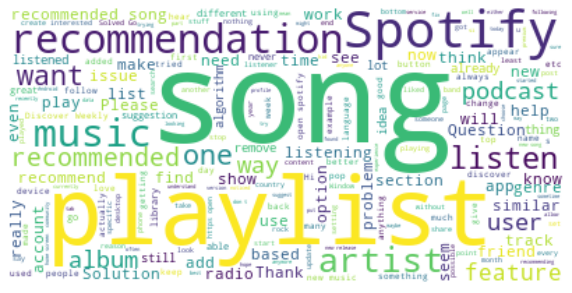

In [81]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
text = " ".join(i for i in subtext)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Scraping reviews concerning recommendations
https://community.spotify.com/t5/forums/searchpage/tab/message?q=weather&noSynonym=false&page=1&collapse_discussion=true%27

In [ ]:
#nltk.download('wordnet')
#!pip install gensim

In [108]:
review_links=[]
for i in range(1,33):
    link='https://community.spotify.com/t5/forums/searchpage/tab/message?q=weather&noSynonym=false&page='+str(i)+'&collapse_discussion=true'
    html=r.get(link).text
    soup=bs.BeautifulSoup(html,'html.parser')
    for i in soup.find_all('a',class_='page-link lia-link-navigation lia-custom-event'):
        x= i.get('href')
        review_links.append('https://community.spotify.com'+str(x)) 

In [109]:
title=[]
for i in review_links:
    html=r.get(i).text
    soup=bs.BeautifulSoup(html,'html.parser')
    x= soup.find('div',class_='lia-message-subject')
    title.append(x.text.replace('\t','').replace('\n',''))
    

In [110]:
subtext=[]
for i in review_links:
    html=r.get(i).text
    soup=bs.BeautifulSoup(html,'html.parser')
    x= soup.find('div',class_='lia-message-body-content')
    try:
        subtext.append(x.text.replace('\t','').replace('\n','').replace('\xa0',' '))
    except:
        subtext.append('NA')

In [111]:
print(len(subtext))
print(len(title))

311
311


# We remove stop words from the reviews scraped and build a word cloud

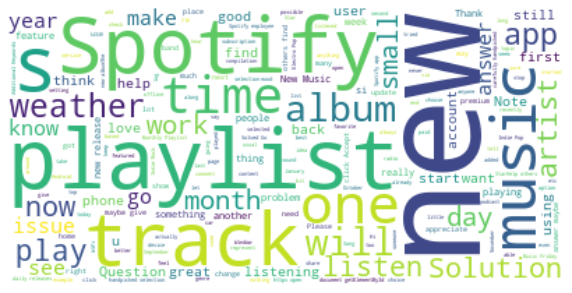

In [115]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
text = " ".join(i for i in subtext)
a=text.split(' ')
final=[i.replace('song','').replace('spotify','') for i in a]   
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(final))
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Clustering using LDA to classify the user reviews text into 6 clusters

# Word Tokenization

In [116]:
word_list= []
for i in subtext:
    x = word_tokenize(i)
    word_list.append(x)

# Remove Stopwords

In [122]:
import string
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [123]:
tot=[]
for review in word_list:
    rvs=[]
    for word in review:
        if word.lower() not in stopwords_list:
            rvs.append(word.lower())  
    tot.append(rvs)

# Lemmatization

In [154]:
lemma=[]
lemmatizer = nltk.stem.WordNetLemmatizer()
for token in tot:
    lemmatized_token = [lemmatizer.lemmatize(item.lower()) for item in token if item.isalpha()]
    lemma.append(lemmatized_token)

# Count Vectorization

In [155]:
count_list=[]
for i in lemma:
    aud=" ".join(i)
    count_list.append(aud)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',min_df=5,ngram_range=(1,2),strip_accents='unicode')
X2 = vectorizer.fit_transform(count_list)
terms = vectorizer.get_feature_names()
print(X2.shape)
print(X2.toarray())

(311, 969)
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# LDA

In [174]:
from sklearn.decomposition import LatentDirichletAllocation
num_topics=6
lda = LatentDirichletAllocation(n_components=num_topics).fit(X2)
#random_state=123
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([terms[i] for i in topic.argsort()[::-1]]))
print(lda.components_)

Topic 0:
pop answer dream pop dream dream pop dance pop baroque baroque pop pop electro chamber pop pop baroque pop chamber dance chamber electro pop electro folk indie pop indie folk pop pop dance pop folk new discover weekly weekly discover maybe spotify featured weather selection maybe starhelp answer starhelp answer click appreciate answer accept solution click accept solution appreciate answer maybe accept spotify employee employee appreciate solution playlist time click latest curated companion mainstream perfect min mainstream pop including latest selection song time min poptuesday tuesday soundofus curated tuesday pop release poptuesday handpicked pop new perfect companion latest mainstream keywords alternative companion discover weekly poptuesday song including alternative pop pop curated release indie comment tuesday spotify song additional keywords additional keywords alternative soundofus handpicked selection including content handpicked new music submission comment content

# Topic Matrix

In [175]:
lda_output = lda.transform(X2)
# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(subtext))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
dominant_topic2 = df_document_topic.values.argsort()[:, -2]
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic['dominant_topic2'] = dominant_topic2

In [176]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda, n_words=5):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda, n_words=5)

In [177]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
print(df_topic_keywords)

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
print(df_topic_distribution.sort_values('Topic Num', ascending=False))

          Word 0    Word 1    Word 2     Word 3     Word 4
Topic 0      pop    answer     dream  pop dream  dream pop
Topic 1  spotify       app   account    premium       song
Topic 2  spotify     music  question     answer  community
Topic 3     song      star      rock      indie      radio
Topic 4      new  playlist   release      daily      indie
Topic 5     song   spotify  playlist      music      album
   Topic Num  Num Documents
1          5             98
3          4             22
4          3             22
2          2             28
0          1            132
5          0              9
